#### Usage

There are 5 parts:

1. Load data (from Question 1)
2. Calculate Decision Boundary
3. Plot (scatter plot and decision boundary)
4. Generate new data and add noise
5. Calculate the accuracy of the new data using a given classifier

Usage: There are 2 use cases based on the initial data used (N=10 or N=200). Toggle between the modes by commenting in the desired data variables, `data_1`, `data_2`, then running the subsequent code

#### Part 1: Load Data

In [1]:
# Initialize the libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

num_samples = 100

mu = [4, 7]
cov = [[9.0, 3.0], [3.0, 10.0]]

mu_2 = [5, 10]
cov_2 = [[7.0, 0.0], [0.0, 16.0]]

In [2]:
# Function to generate data

def generate_sample(mu, cov, count=num_samples):
    sample = np.random.multivariate_normal(mu, cov, count)
    return sample

In [3]:
# Data Generation (hardcoding for assignment purposes)

data_1 = generate_sample(mu, cov)
data_2 = generate_sample(mu_2, cov_2)

# data_1 = np.array([[8.49, 6.38],
#                   [4.74, 3.88],
#                   [5.11, 14.60],
#                   [6.23, 5.26],
#                   [4.56, 3.78]])

# data_2 = np.array([[7.38, 13.73],
#                   [5.52, 12.52],
#                   [1.26, 8.75],
#                   [7.89, 9.80],
#                   [4.26, 8.16]])

#### Part 2: Calculate Decision Boundary

In [4]:
# Calculate decision boundary

m1 = np.mean(data_1, axis=0)
m2 = np.mean(data_2, axis=0)

# Coefficients of standard form Ax2 + Bx1 + C = 0
A = -m1[0]+m2[0]
B = -m1[1]+m2[1]
C = 0.5*(m1[0]**2+m1[1]**2)-0.5*(m2[0]**2+m2[1]**2)

print("x2=(-A/B)x1-(C/B): ", -(A/B), "x1 + ", -(C/B))

x2=(-A/B)x1-(C/B):  -0.0927159597487606 x1 +  9.274694995071155


#### Part 3: Plot

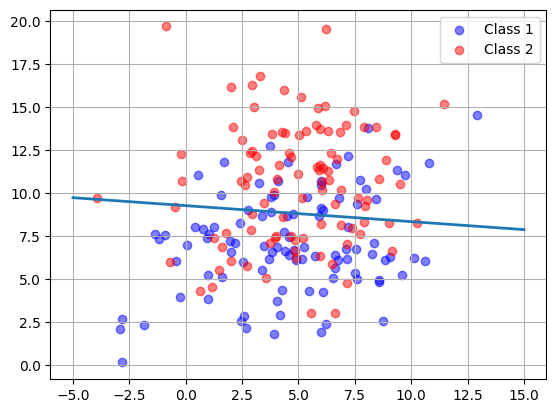

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Plot the data
ax1.scatter(data_1[:, 0], data_1[:, 1], c='b', alpha=0.5, label='Class 1')
ax1.scatter(data_2[:, 0], data_2[:, 1], c='r', alpha=0.5, label='Class 2')

# Plot the decision boundary
x = np.linspace(-5, 15, 100)
y = -(A/B)*x-C/B
ax1.plot(x, y, linewidth=2.0)

# Display plot
plt.grid()
plt.legend()
plt.show()

#### Part 4: Adding White Noise

Not sure what the question is asking - assuming it means to generate new data then add noise from the given distribution to each new datapoint

In [6]:
mu_noise = [0, 0]
cov_noise = [[1, 0], [0, 1]]

noise = generate_sample(mu_noise, cov_noise, 100)
new_data_1 = generate_sample(mu, cov, 50)
new_data_2 = generate_sample(mu_2, cov_2, 50)

noisy_data_1 = new_data_1 + noise[0:50]
noisy_data_2 = new_data_2 + noise[50:100]

#### Part 5: Calculate Accuracy

In [7]:
def classifier(x1):
    return -(A/B)*x1-(C/B)

def calc_accuracy(classA, classB):
    correct_predictions = 0
    for datapoint in classA:
        if classifier(datapoint[0]) >= datapoint[1]:
            correct_predictions += 1
    for datapoint in classB:
        if classifier(datapoint[0]) <= datapoint[1]:
            correct_predictions += 1
    return correct_predictions / (len(classA)+len(classB))


In [8]:
calc_accuracy(noisy_data_1, noisy_data_2)

0.69